In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [10]:
pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 126.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import librosa

In [12]:
y, sr = librosa.load("AudioNote.mp3")

Text(0, 0.5, 'Sound waverform')

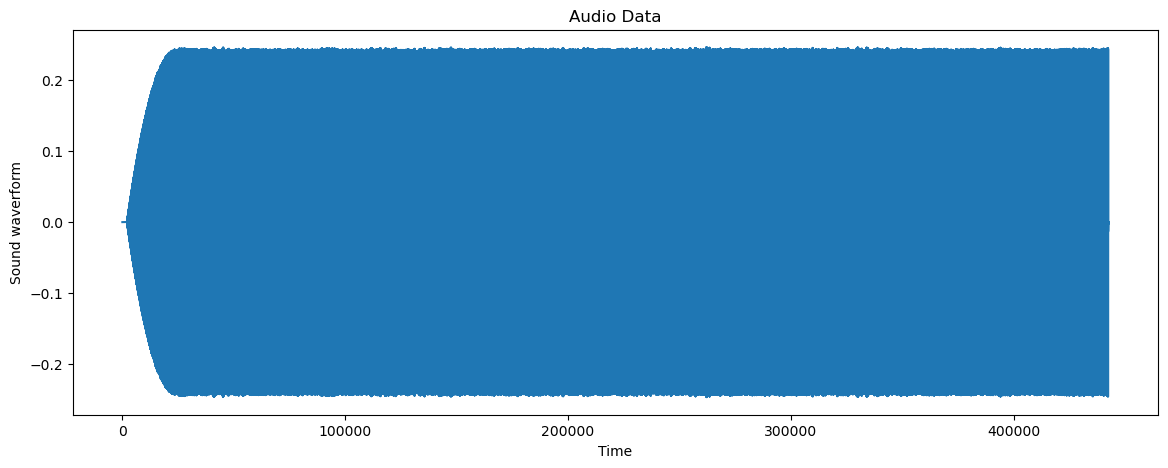

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.xlabel('Time')
plt.title('Audio Data')
plt.ylabel('Sound waverform')

## (a). 
The soundwave is of high frequency, with a relatively constant amplitude.

## (b)
Rely on the periodogram to find the fourier frequency.

In [19]:
def periodogram(y):
    fft_y = np.fft.fft(y)
    n = len(y)
    fourier_freqs = np.arange(1/n, 1/2, 1/n)
    m = len(fourier_freqs)
    pgram_y = (np.abs(fft_y[1:m+1]) ** 2)/n
    return fourier_freqs, pgram_y

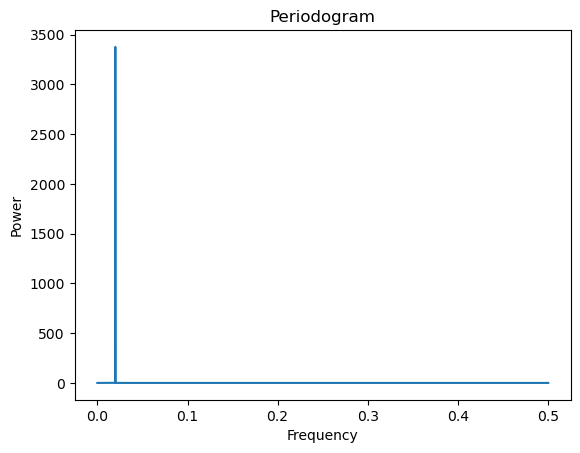

In [20]:
freqs, pgram = periodogram(y)
plt.plot(freqs, pgram)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram')
plt.show()

In [16]:
def rss_periodogram(y):
    fft_y = np.fft.fft(y)
    n = len(y)
    fourier_freqs = np.arange(1/n, 1/2, 1/n)
    m = len(fourier_freqs)
    pgram_y = (np.abs(fft_y[1:m+1]) ** 2)/n
    var_y = np.sum((y - np.mean(y)) ** 2)
    rssvals = var_y - 2*pgram_y
    return fourier_freqs, rssvals

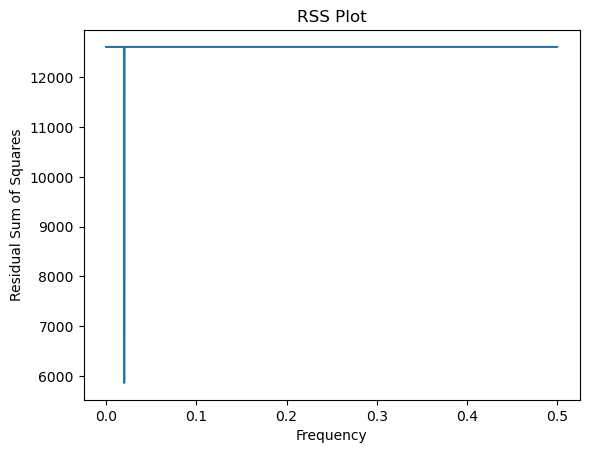

In [17]:
freqs, rssvals = rss_periodogram(y)
plt.plot(freqs, rssvals)
plt.xlabel('Frequency')
plt.ylabel('Residual Sum of Squares')
plt.title('RSS Plot')
plt.show()

In [18]:
#Find the best estimate of the frequency parameter f in the single sinusoidal model: 
fhat = freqs[np.argmin(rssvals)]
print(fhat)
#Get the frequency in Hertz (which is the number of cycles in one sec)
print(fhat * sr)

0.01995368539960463
439.97876306128205


In [21]:
#calculate the uncertainty in the frequency estimate
#Uncertainty quantification for f: 
def logpost_periodogram(y):
    fft_y = np.fft.fft(y)
    n = len(y)
    fourier_freqs = np.arange(1/n, (1/2) + (1/n), 1/n)
    m = len(fourier_freqs)
    pgram_y = (np.abs(fft_y[1:m+1]) ** 2)/n
    var_y = np.sum((y - np.mean(y)) ** 2)
    rssvals = var_y - 2*pgram_y
    p = 3
    logpostvals = ((p-n)/2) * np.log(rssvals)
    return fourier_freqs, logpostvals

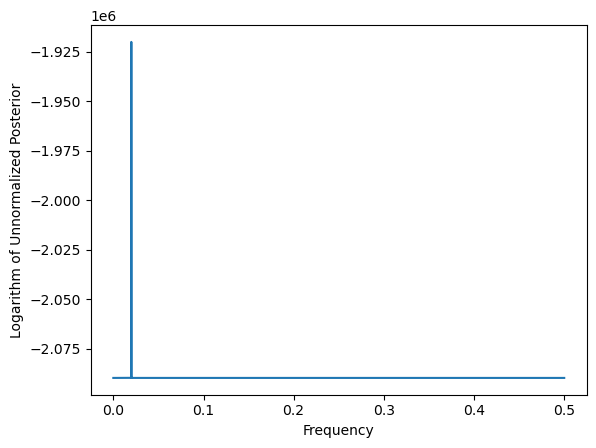

In [22]:
freqs, logpostvals = logpost_periodogram(y)
plt.plot(freqs, logpostvals)
plt.xlabel('Frequency')
plt.ylabel('Logarithm of Unnormalized Posterior')
plt.show()

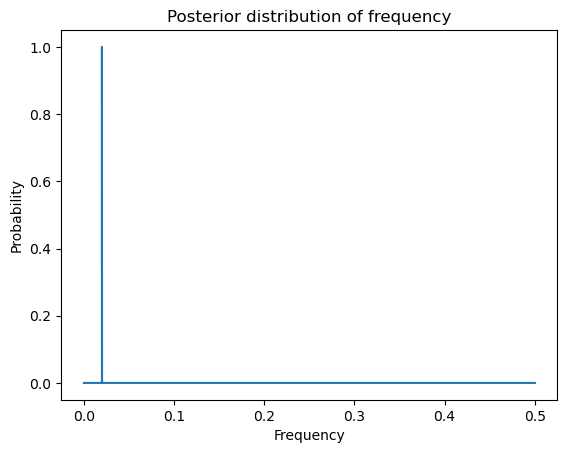

In [23]:
#exponentialize the log posterior and normalize
postvals_unnormalized = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals_unnormalized/(np.sum(postvals_unnormalized))
plt.plot(freqs, postvals)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.title('Posterior distribution of frequency')
plt.show()

In [24]:
#calculate the credible interval for f
def PostProbAroundMax(m):
    est_ind = np.argmax(postvals)
    ans = np.sum(postvals[(est_ind-m):(est_ind+m)])
    return(ans)
m = 0
while PostProbAroundMax(m) <= 0.95:
    m = m+1
est_ind = np.argmax(postvals)
f_est = freqs[est_ind]
#95% credible interval for f:
ci_f_low = freqs[est_ind - m]
ci_f_high = freqs[est_ind + m]
print(np.array([f_est, ci_f_low, ci_f_high]))
#Uncertainty estimate in Hertz:
f_est_hz = f_est * sr
ci_f_low_hz = ci_f_low * sr
ci_f_high_hz = ci_f_high * sr
print(np.array([f_est_hz, ci_f_low_hz, ci_f_high_hz]))

[0.01995369 0.01995143 0.01995594]
[439.97876306 439.92894663 440.0285795 ]


so the point estimate for frequency is 0.01995368539960463, and the 95% uncertainty interval is [0.01995143 0.01995594].

## (C)
The best estimate of frequency in herz is 439.97876306 as previously calculated.

## (d)
According to the scale of musical note's corresponding frequency level, it should be $A_{4}$.

# Q2

In [41]:
lynx = pd.read_csv("lynx.csv")

In [42]:
t = lynx['year']
y = lynx['count']

## (a)

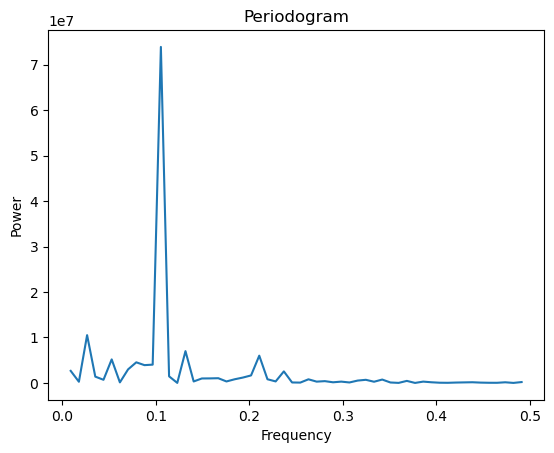

In [43]:
#(a)
freqs, pgram = periodogram(y)
plt.plot(freqs, pgram)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Periodogram')
plt.show()

the periodogram peaks at around 0.1 frequency level and is relatively flat after 0.23-0.24. Oscillation exists in the surrounding of the peak.

## (b)

In [44]:
#calculate the uncertainty in the frequency estimate
freqs, logpostvals = logpost_periodogram(y)

postvals_unnormalized = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals_unnormalized/(np.sum(postvals_unnormalized))

m = 0
while PostProbAroundMax(m) <= 0.95:
    m = m+1
est_ind = np.argmax(postvals)
f_est = freqs[est_ind]
#95% credible interval for f:
ci_f_low = freqs[est_ind - m]
ci_f_high = freqs[est_ind + m]
print("uncertainty interval:", np.array([ci_f_low, ci_f_high]))

#calculate the corresponding period of oscillation
period = 1/f_est
print("period:", period)

uncertainty interval: [0.09649123 0.11403509]
period: 9.5


## (c)

In [45]:
rng = np.random.default_rng(seed = 42)

freqs, logpostvals = logpost_periodogram(y)
postvals_unnormalized = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals_unnormalized/(np.sum(postvals_unnormalized))

In [48]:
import statsmodels.api as sm

In [53]:
N = 2000
post_samples = np.zeros((N, 5))
post_samples[:, 0] = rng.choice(freqs, N, replace=True, p=postvals)

for i in range(N):
    n = len(y)
    f = post_samples[i, 0]
    X = np.column_stack((np.ones(len(t)), np.cos(2 * np.pi * f * t), np.sin(2 * np.pi * f * t)))
    model = sm.OLS(y, X).fit()
    p = X.shape[1]
    
    chirv = rng.chisquare(df = n - p)
    sig_sample = np.sqrt(np.sum(model.resid ** 2) / chirv) #posterior sample from sigma
    post_samples[i, (p + 1)] = sig_sample

    covmat = (sig_sample ** 2) * np.linalg.inv(np.dot(X.T, X))
    beta_sample = rng.multivariate_normal(mean = model.params, cov = covmat, size = 1)
    post_samples[i, 1:(p + 1)] = beta_sample

print(post_samples)

[[ 1.05263158e-01  1.55948981e+03 -1.51010755e+03  5.48986156e+02
   1.16238196e+03]
 [ 1.05263158e-01  1.36014202e+03 -1.47348870e+03  6.14373430e+02
   1.04087233e+03]
 [ 1.05263158e-01  1.54038061e+03 -1.42787288e+03  5.32117410e+02
   1.26046709e+03]
 ...
 [ 1.05263158e-01  1.42272236e+03 -1.34637601e+03  5.54996200e+02
   1.05460304e+03]
 [ 1.05263158e-01  1.51471748e+03 -1.19956930e+03  4.92432919e+02
   1.14724250e+03]
 [ 1.05263158e-01  1.53379419e+03 -1.57289941e+03  4.55934312e+02
   1.04954028e+03]]


In [54]:
sigma_interval = np.quantile(post_samples[:, 1], [0.025, 0.975])
beta0_interval = np.quantile(post_samples[:, 2], [0.025, 0.975])
beta1_interval = np.quantile(post_samples[:, 3], [0.025, 0.975])
beta2_interval = np.quantile(post_samples[:, 4], [0.025, 0.975])

print("Hereby is the 95% credible interval for the parameters:")
print("sigma interval:", sigma_interval)
print("beta0 interval:", beta0_interval)
print("beta1 interval:", beta1_interval)
print("beta2 interval:", beta2_interval)

Hereby is the 95% credible interval for the parameters:
sigma interval: [1329.06947488 1747.36263998]
beta0 interval: [-1804.36932507 -1234.54356799]
beta1 interval: [214.58905987 806.93635044]
beta2 interval: [ 981.76495343 1275.99392246]


## (d)

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     60.12
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           2.04e-18
Time:                        14:25:27   Log-Likelihood:                -959.47
No. Observations:                 114   AIC:                             1925.
Df Residuals:                     111   BIC:                             1933.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1538.0175    103.829     14.813      0.0

/var/folders/vw/g8lksmhs48b47g3pq3t99myr0000gn/T/ipykernel_92591/2939074375.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, model.fittedvalues, 'r-', label='Model', color='red')


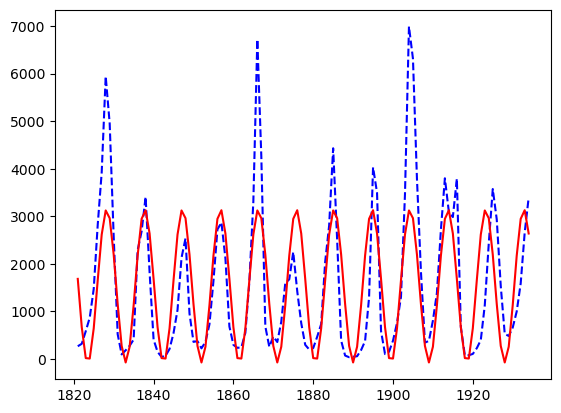

In [39]:
#plot the raw data and the model fit of model
plt.plot(t, y, '--', label='Data', color = 'blue')
plt.plot(t, model.fittedvalues, 'r-', label='Model', color='red')

The model in (1) could capture the sinusoidal oscillation pattern from the original dataset, though it may not capture all of the different peak amplitudes. Model fitting is satisfactory on account of the statistical significance of all parameters and the stringent uncertainty interval of frequency f. What's more, the R square which equals 0.52 (and also the adjusted R square equals 0.511) is also high. Hence, the model is a satisfactory representation (good fit) of the original dataset.

# Q3

In [83]:
mask = pd.read_csv('mask.csv')
mask.columns = mask.iloc[0]
mask.drop(mask.index[0], inplace=True)
mask.columns = mask.columns.str.strip()

In [84]:
mask.rename(columns={'月份': 'time', 'mask: (美国)': 'y'}, inplace=True)

In [113]:
mask.iloc[:, 0]

'9'

In [133]:
def rss(c):
    x = np.arange(1, n+1)
    xc = (x > c).astype(float)
    X = np.column_stack([np.ones(n), xc])
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    return rss

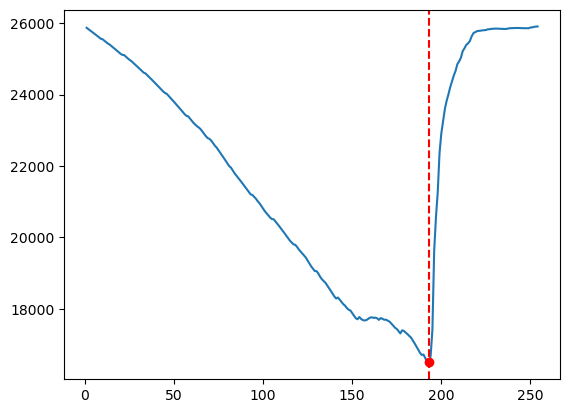

In [134]:
# Define y and n
y = mask['y'].astype(float).values
n = len(y)

allcvals = np.arange(1, n+1) 
rssvals = np.array([rss(c) for c in allcvals])

c_hat = allcvals[np.argmin(rssvals)]

plt.plot(allcvals, rssvals)
plt.plot(c_hat, np.min(rssvals), 'ro')
plt.axvline(x=c_hat, color='r', linestyle='--')
plt.show()

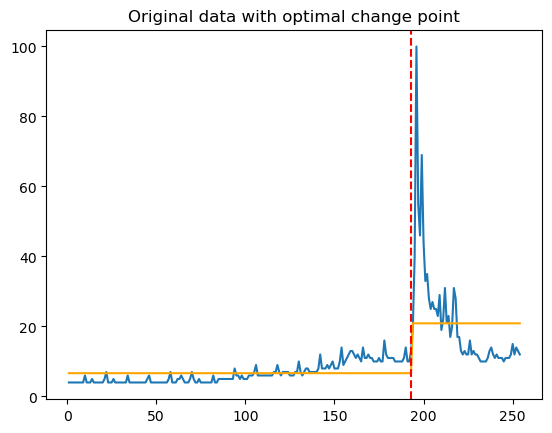

In [135]:
X = np.column_stack([np.ones(n), (np.arange(1, n+1) > c_hat).astype(float)])
md_best = sm.OLS(y, X).fit()

plt.plot(np.arange(1, n+1), y)
plt.plot(np.arange(1, n+1), md_best.fittedvalues, color='orange')
plt.axvline(x=c_hat, color='r', linestyle='--')
plt.title('Original data with optimal change point')
plt.show()


## (a)

In [136]:
print(c_hat)
print(mask.iloc[c_hat - 1])

193
月份
y    13
Name: 2020-01, dtype: object


[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

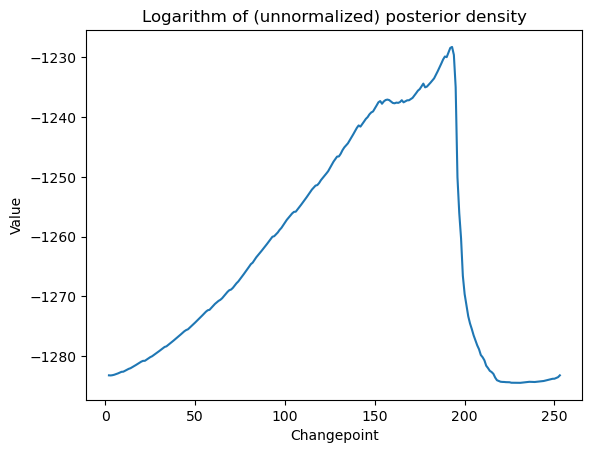

In [138]:
# use bayesian posterior to quantify the uncertainty in the change point estimate
# Bayesian log posterior
def logpost(c):
    x = np.arange(1, n+1)
    xc = (x > c).astype(float)
    X = np.column_stack([np.ones(n), xc])
    p = X.shape[1]
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    sgn, log_det = np.linalg.slogdet(np.dot(X.T, X)) # sgn gives the sign of the determinant (in our case, this should be 1)
    # log_det gives the logarithm of the absolute value of the determinant
    logval = ((p-n)/2) * np.log(rss) - (0.5)*log_det
    return logval

allcvals = np.arange(2, n) # we are omitting c = 1 and c = n to prevent singularity
print(allcvals)
logpostvals = np.array([logpost(c) for c in allcvals])
plt.plot(allcvals, logpostvals)
plt.xlabel('Changepoint')
plt.ylabel('Value')
plt.title('Logarithm of (unnormalized) posterior density')
plt.show() 
# this plot should look similar to the RSS plot

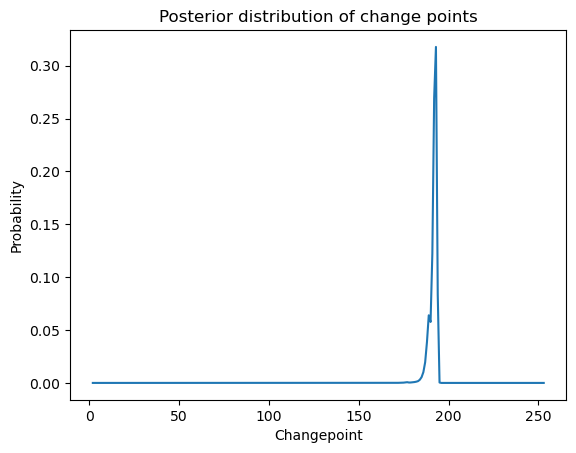

In [139]:
postvals_unnormalized = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals_unnormalized/(np.sum(postvals_unnormalized))
plt.plot(allcvals, postvals)
plt.xlabel('Changepoint')
plt.ylabel('Probability')
plt.title('Posterior distribution of change points')
plt.show()

In [140]:
#95% credible interval for c:
def PostProbAroundMax(m):
    est_ind = np.argmax(postvals)
    ans = np.sum(postvals[(est_ind-m):(est_ind+m)])
    return(ans)
m = 0
while PostProbAroundMax(m) <= 0.95:
    m = m+1
est_ind = np.argmax(postvals)
c_est = allcvals[est_ind]
#95% credible interval for f:
ci_c_low = allcvals[est_ind - m]
ci_c_high = allcvals[est_ind + m]
print("95% uncertainty interval for c", np.array([ci_c_low, ci_c_high]))

95% uncertainty interval for c [188 198]


The answer makes sense since the break point is near the time period where the pandemic in US is start to spread, and the searching for the word mask should increase extensively, which is exactly the case we observe from the original dataset as previously generated.

## (b)

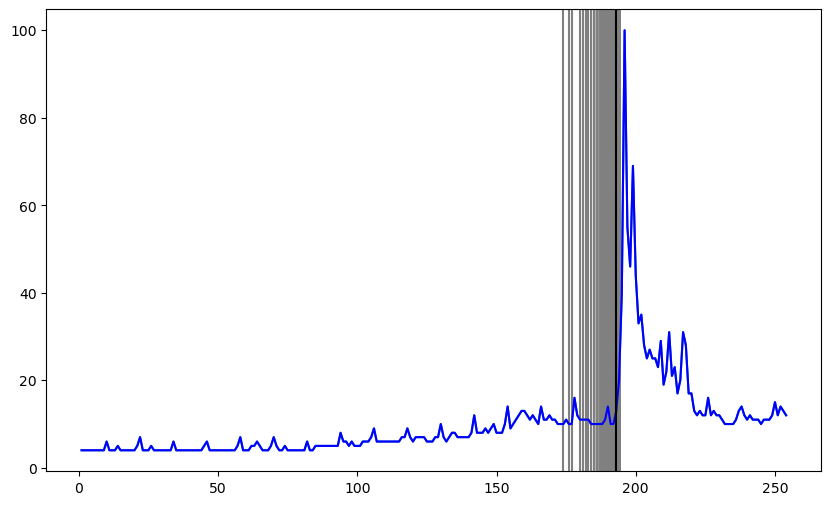

In [141]:
#Drawing posterior samples for c: 
N = 1000
rng = np.random.default_rng(seed = 42)
cpostsamples = rng.choice(allcvals, N, replace = True, p = postvals)

tme = np.arange(1, n+1)

#Let us plot the posterior samples for c on the original data:
plt.figure(figsize = (10, 6))
plt.plot(tme, y)
for i in range(N):
    plt.axvline(x = tme[cpostsamples[i]-1], color = 'gray')
plt.plot(tme, y, color = 'blue')
plt.axvline(x = tme[c_hat-1], color = 'black')
plt.show()

In [ ]:
# Drawing posterior samples from all the parameters: c, b0, b1, sigma
post_samples = np.zeros(shape=(N, 4))
post_samples[:, 0] = cpostsamples
for i in range(N):
    c = cpostsamples[i]
    xc = ((x > c).astype(float))
    X = np.column_stack([np.ones(n), xc])
    p = X.shape[1]
    md_c = sm.OLS(y, X).fit()
    chirv = rng.chisquare(df=n-p)
    sig_sample = np.sqrt(np.sum(md_c.resid ** 2) / chirv)  # posterior sample from sigma
    post_samples[i, 3] = sig_sample  # corrected index to 3
    covmat = (sig_sample ** 2) * np.linalg.inv(np.dot(X.T, X))
    beta_sample = rng.multivariate_normal(mean=md_c.params, cov=covmat, size=1)
    post_samples[i, 1:3] = beta_sample  # corrected index to 1:3
print(post_samples)

[[193.           6.53522769  14.62652138   7.46484128]
 [192.           6.86709715  13.19846023   7.8118391 ]
 [193.           5.93060091  16.90966407   8.8087138 ]
 ...
 [177.           6.94576157  11.55155023   8.10466909]
 [194.           6.08232725  14.39915161   7.92804603]
 [191.           6.63743444  13.40608905   7.88885541]]


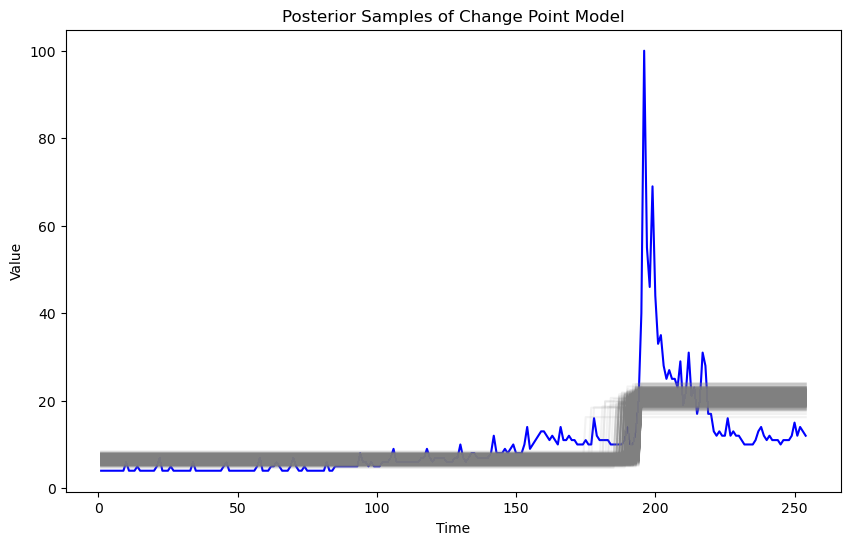

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(tme, y, label='Original Data', color='blue')
for i in range(N):
    c_sample = int(post_samples[i, 0])
    beta0_sample = post_samples[i, 1]
    beta1_sample = post_samples[i, 2]
    plt.plot(tme, beta0_sample + beta1_sample * (tme > c_sample), color='gray', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Posterior Samples of Change Point Model')
plt.show()

## (c)

The break point could capture the bursting increase of searching trend, but the model would be too simple for capture other oscillation from the original dataset along with the relative amplitude of each oscillation. These may need to add sinusoidal part into the model structure.

# Q4
For the periodogram A, we can observe that most of the power lies in the high frequency spectrum, while for the periodogram B, most of the power lies in the low frequency spectrum. Looking back to the raw data, we can observe that the time series from dataset 1 is of relatively flat and gentle oscillation, compared to the relatively intensive and rapid oscillation from dataset 2. Hence, the periodogram A is paired with dataset 2 which has relatively higher frequency, and periodogram B is paired with dataset 1 which has relatively lower frequency.

# Q5

## (a)

## Periodic Sequence DFT Relationship

We are given a sequence $ y_0, y_1, \dots, y_{n-1} $ that is periodic with period $ h $, meaning $ y_{t + h u} = y_t $ for all integers $ t $ and $ u $. Also, $ n = k h $ for some integer $ k $, so $ n $ is an integer multiple of $ h $. The Discrete Fourier Transform (DFT) of the entire sequence is $ b_0, b_1, \dots, b_{n-1} $, and the DFT of the first cycle $ y_0, y_1, \dots, y_{h-1} $ is $ \beta_0, \beta_1, \dots, \beta_{h-1} $. We aim to show that:

- $ b_0 = k \beta_0 $, $ b_k = k \beta_1 $, $ b_{2k} = k \beta_2 $, $ \dots $, $ b_{(h-1)k} = k \beta_{h-1} $,
- $ b_j = 0 $ for all other $ j $ that are not multiples of $ k $.

### Step 1: DFT Definitions

The DFT of the sequence $ y_0, y_1, \dots, y_{n-1} $ is:

$$
b_j = \sum_{t=0}^{n-1} y_t \cdot e^{-2\pi i j t / n}, \quad j = 0, 1, \dots, n-1.
$$

The DFT of the first cycle $ y_0, y_1, \dots, y_{h-1} $ is:

$$
\beta_m = \sum_{t=0}^{h-1} y_t \cdot e^{-2\pi i m t / h}, \quad m = 0, 1, \dots, h-1.
$$

Since the sequence is periodic with period $ h $, we have $ y_t = y_{t \mod h} $.

### Step 2: Express $ b_j $ Using Periodicity

Compute $ b_j $:

$$
b_j = \sum_{t=0}^{n-1} y_t \cdot e^{-2\pi i j t / n}.
$$

Since $ n = k h $, split the sum into $ k $ blocks of length $ h $:

$$
b_j = \sum_{m=0}^{k-1} \sum_{t=0}^{h-1} y_{m h + t} \cdot e^{-2\pi i j (m h + t) / n}.
$$

Using periodicity, $ y_{m h + t} = y_t $, so:

$$
b_j = \sum_{m=0}^{k-1} \sum_{t=0}^{h-1} y_t \cdot e^{-2\pi i j (m h + t) / n}.
$$

Factor the exponential:

$$
e^{-2\pi i j (m h + t) / n} = e^{-2\pi i j m h / n} \cdot e^{-2\pi i j t / n}.
$$

Thus:

$$
b_j = \sum_{t=0}^{h-1} y_t \cdot e^{-2\pi i j t / n} \cdot \sum_{m=0}^{k-1} e^{-2\pi i j m h / n}.
$$

### Step 3: Evaluate the Inner Sum

Consider the inner sum:

$$
\sum_{m=0}^{k-1} e^{-2\pi i j m h / n}.
$$

Since $ n = k h $, we have $ h / n = 1 / k $, so:

$$
\sum_{m=0}^{k-1} e^{-2\pi i j m / k}.
$$

This is a geometric series with ratio $ r = e^{-2\pi i j / k} $:

$$
\sum_{m=0}^{k-1} r^m = \frac{1 - r^k}{1 - r}, \quad \text{if} \ r \neq 1.
$$

Compute $ r^k $:

$$
r^k = \left( e^{-2\pi i j / k} \right)^k = e^{-2\pi i j} = 1, \quad \text{since} \ j \ \text{is an integer}.
$$

If $ r \neq 1 $:

$$
\sum_{m=0}^{k-1} r^m = \frac{1 - 1}{1 - r} = 0.
$$

Now, $ r = e^{-2\pi i j / k} = 1 $ when $ j / k $ is an integer, i.e., $ j = \ell k $. Then:

$$
\sum_{m=0}^{k-1} 1^m = k.
$$

So:

$$
\sum_{m=0}^{k-1} e^{-2\pi i j m / k} = 
\begin{cases} 
k, & \text{if} \ j = \ell k, \\
0, & \text{otherwise}.
\end{cases}
$$

### Step 4: Substitute Back into $ b_j $

- If $ j $ is not a multiple of $ k $, the inner sum is 0, so $ b_j = 0 $.
- If $ j = \ell k $:

$$
b_j = k \cdot \sum_{t=0}^{h-1} y_t \cdot e^{-2\pi i (\ell k) t / n}.
$$

Since $ n = k h $:

$$
-2\pi i \ell k t / (k h) = -2\pi i \ell t / h,
$$

$$
b_j = k \cdot \sum_{t=0}^{h-1} y_t \cdot e^{-2\pi i \ell t / h} = k \cdot \beta_\ell.
$$

Since $ j = \ell k $ and $ j $ ranges from 0 to $ n-1 = k h - 1 $, we have $ \ell = 0, 1, \dots, h-1 $.

### Step 5: Verify the Indices

- $ j = 0 $: $ \ell = 0 $, $ b_0 = k \beta_0 $,
- $ j = k $: $ \ell = 1 $, $ b_k = k \beta_1 $,
- $ j = 2k $: $ \ell = 2 $, $ b_{2k} = k \beta_2 $,
- $ \dots $,
- $ j = (h-1)k $: $ \ell = h-1 $, $ b_{(h-1)k} = k \beta_{h-1} $.

For all other $ j $, $ b_j = 0 $.

### Conclusion

Thus:

$$
b_{mk} = k \beta_m, \quad m = 0, 1, \dots, h-1,
$$

$$
b_j = 0, \quad \text{for all other} \ j.
$$

## (b)

In [234]:
halloween = pd.read_csv("halloween.csv")
halloween.columns = halloween.iloc[0]
#drop the last two rows of halloween
halloween = halloween.iloc[:-2]

In [252]:
y = halloween.iloc[1:, 0].values.astype(float)
t = np.arange(1, len(y) + 1)


(252,)

Text(0, 0.5, 'Value')

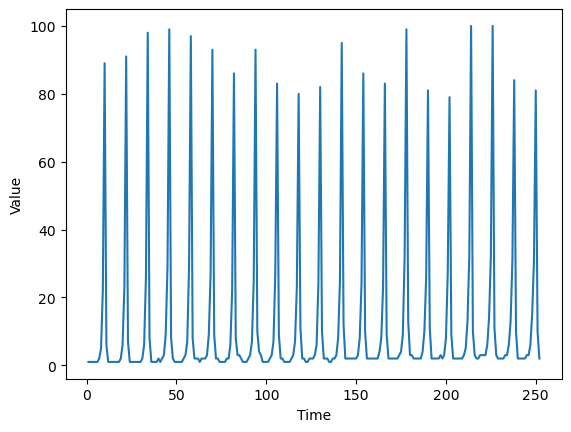

In [254]:
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Value')

The data displays a clear seasonal pattern with yearly peaks in October, increasing search popularity over time, and near-zero interest during the rest of the year. The predictability of the trend makes it a classic example of a strongly seasonal time series.

# Q6

In [151]:
golf = pd.read_csv('golf.csv')
golf.columns = mask.iloc[0]

In [155]:
y = golf.iloc[:, 0].values[1:]

月份         golf: (美国)
2004-01            45
2004-02            51
2004-03            65
2004-04            78
              ...    
2024-10            42
2024-11            36
2024-12            37
2025-01            35
2025-02            41
Name: 4, Length: 255, dtype: object

In [167]:
n = len(y)

254

# (a)

In [222]:
t = np.arange(1, n+1)
#get point estimate
def crit(f):
    X = np.column_stack([np.ones(len(t)), t, t**2, np.cos(2 * np.pi * f * t), np.sin(2 * np.pi * f * t)])
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    return rss

allfvals = np.arange(1 / n, 1 / 2, 0.0001)
critvals = np.array([crit(f) for f in allfvals])
f_est = allfvals[np.argmin(critvals)]

In [229]:
# Ensure t and y have the same length
# t = t[:len(y)]
t = np.arange(1, n+1)

# Convert y to numeric type
y = y.astype(float)

# Define the model
def model_matrix(t, f):
    return np.column_stack([np.ones(len(t)), t, t**2, np.cos(2 * np.pi * f * t), np.sin(2 * np.pi * f * t)])

def logpost(f):
    X = model_matrix(t, f)
    p = X.shape[1]
    model = sm.OLS(y, X).fit()
    rss = np.sum(model.resid ** 2)
    sgn, log_det = np.linalg.slogdet(np.dot(X.T, X)) # sgn gives the sign of the determinant (in our case, this should be 1)
    # log_det gives the logarithm of the absolute value of the determinant
    logval = ((p - n) / 2) * np.log(rss) - (0.5) * log_det
    return logval


logpostvals = np.array([logpost(f) for f in allfvals])

postvals = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals / (np.sum(postvals))

# Draw posterior samples for f, beta0, beta1, beta2, beta3, beta4, sigma
N = 2000
post_samples = np.zeros((N, 7))
post_samples[:, 0] = rng.choice(allfvals, N, replace=True, p=postvals)

for i in range(N):
    f = post_samples[i, 0]
    X = model_matrix(t, f)
    model = sm.OLS(y, X).fit()
    p = X.shape[1]
    
    chirv = rng.chisquare(df=len(y) - p)
    sig_sample = np.sqrt(np.sum(model.resid ** 2) / chirv)  # posterior sample from sigma
    post_samples[i, 6] = sig_sample

    covmat = (sig_sample ** 2) * np.linalg.inv(np.dot(X.T, X))
    beta_sample = rng.multivariate_normal(mean=model.params, cov=covmat, size=1)
    post_samples[i, 1:6] = beta_sample

# Calculate the 95% credible interval for f
f_interval = np.quantile(post_samples[:, 0], [0.025, 0.975])
print("Point estimate of f:", f_est)
print("95% credible interval for f:", f_interval)

Point estimate of f: 0.08333700787401596
95% credible interval for f: [0.08333701 0.08343701]


## (b)

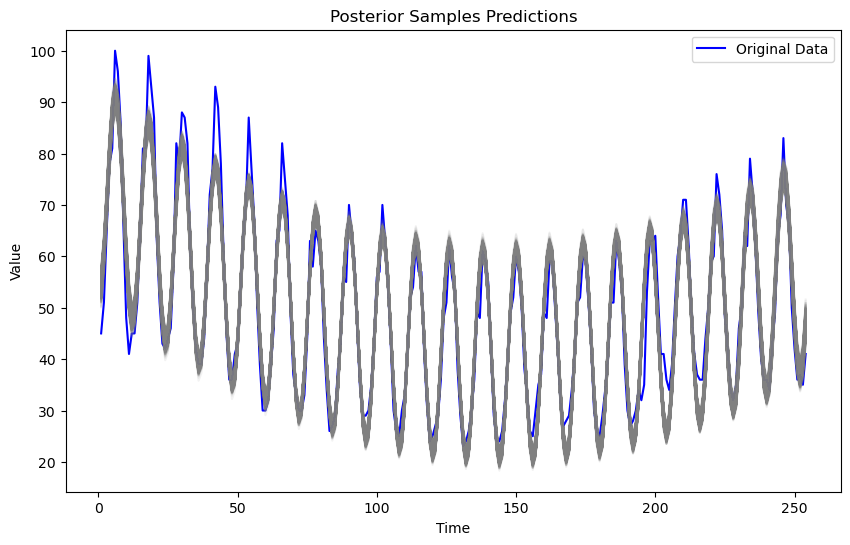

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Original Data', color='blue')
for i in range(N):
    f_sample = post_samples[i, 0]
    beta0_sample = post_samples[i, 1]
    beta1_sample = post_samples[i, 2]
    beta2_sample = post_samples[i, 3]
    beta3_sample = post_samples[i, 4]
    beta4_sample = post_samples[i, 5]
    fitted_values = (beta0_sample + beta1_sample * t + beta2_sample * t**2 +
                     beta3_sample * np.cos(2 * np.pi * f_sample * t) +
                     beta4_sample * np.sin(2 * np.pi * f_sample * t))
    plt.plot(t, fitted_values, color='gray', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Posterior Samples Predictions')
plt.legend()
plt.show()

## (c)

Model (3) is an appropriate fitting of the dataset since it could satisfactorily capture every oscilation and the relative scale of amplitude of the original dataset.

# Q7

In [255]:
TTLCONS = pd.read_csv("TTLCONS.csv")

In [258]:
y = TTLCONS['TTLCONS']
t = np.arange(1, len(y) + 1)

## (a)

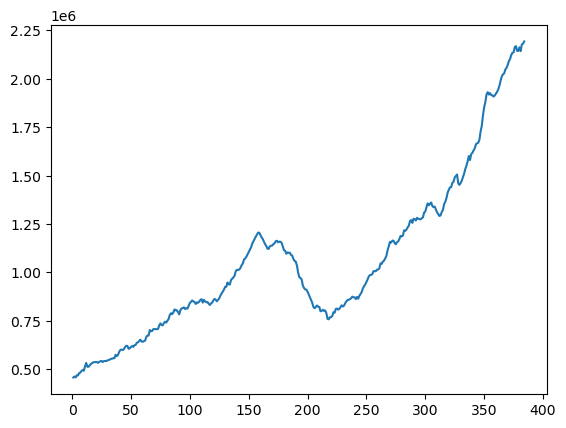

In [260]:
plt.plot(t, y)

In [262]:
#construct the model
def rss(c):
    n = len(y)
    x = np.arange(1, n+1)
    X = np.column_stack([np.ones(n), x])
    if np.isscalar(c):
        c = [c]
    for j in range(len(c)):
        xc = ((x > c[j]).astype(float))*(x-c[j])
        X = np.column_stack([X, xc])
    md = sm.OLS(y, X).fit()
    ans = np.sum(md.resid ** 2)
    return ans

In [263]:
c1_gr = np.arange(1, n-1)
c2_gr = np.arange(1, n-1)
X, Y = np.meshgrid(c1_gr, c2_gr)
g = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})
g['rss'] = g.apply(lambda row: rss([row['x'], row['y']]), axis = 1)

In [265]:
min_row = g.loc[g['rss'].idxmin()]
print(min_row)
c_opt = min_row[:-1]
print(c_opt)

x      2.250000e+02
y      1.750000e+02
rss    1.353677e+12
Name: 44072, dtype: float64
x    225.0
y    175.0
Name: 44072, dtype: float64


In [285]:
print(np.array([TTLCONS.iloc[int(c_opt[0]-1), 0],TTLCONS.iloc[int(c_opt[1]-1), 0]]))

['2011-09-01' '2007-07-01']


/var/folders/vw/g8lksmhs48b47g3pq3t99myr0000gn/T/ipykernel_92591/2251276679.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(np.array([TTLCONS.iloc[int(c_opt[0]-1), 0],TTLCONS.iloc[int(c_opt[1]-1), 0]]))


So the point estimate for s1 and s2 is 225(2011-09-01) and 175(2007-07-01) respectively

## (b)

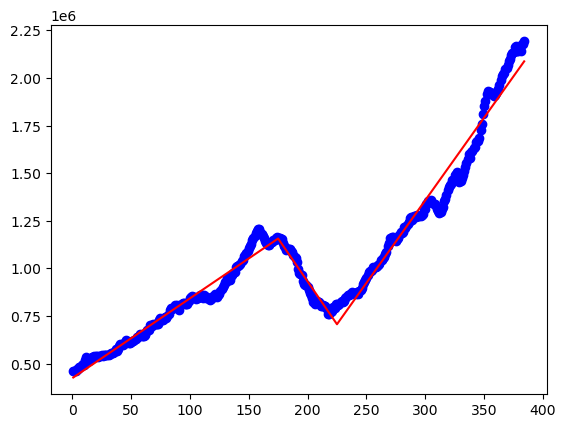

In [289]:
c = np.array(c_opt)
n = len(y)
x = np.arange(1, n+1)
X = np.column_stack([np.ones(n), x])
if np.isscalar(c):
    c = np.array([c])
for j in range(len(c)):
    xc = ((x > c[j]).astype(float))*(x-c[j])
    X = np.column_stack([X, xc])
md_c2 = sm.OLS(y, X).fit()
plt.scatter(t, y, color = 'blue')
plt.plot(t, md_c2.fittedvalues, color = 'red')
plt.show()


## (c)

Model (4) is appropriate for this dataset such that the two general increase intervals and one decrease interval are all accurately captured by the break points. To fit the more precise and detailed oscilation of the data, may consider adding up some sinusoidal terms in the structure.